In [27]:
# First cell - Import libraries and setup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import string
import nltk
import re
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import plotly.express as px

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Second cell - Load Data
# COVID-19 Data
covid_df3 = pd.read_csv('/kaggle/input/covid19-twitter-dataset/Covid-19 Twitter Dataset (Apr-Jun 2021).csv')

# Combine COVID datasets
covid_df = pd.concat([covid_df3], ignore_index=True)

# Monkeypox Data
# Original monkeypox dataset
mpox_files = glob.glob('/kaggle/input/monkeypox-tweets/*.csv')
mpox_df1 = pd.concat(map(pd.read_csv, mpox_files), ignore_index=True)

# New monkeypox dataset
mpox_df2 = pd.read_csv('/kaggle/input/tweets-on-monkeypox/monkeypox.csv')

# New monkeypox dataset
mpox_df3 = pd.read_csv('/kaggle/input/monkeypox-tweets-data/monkeypox_tweets.csv')

# Combine monkeypox datasets
mpox_df = pd.concat([mpox_df1, mpox_df2, mpox_df3], ignore_index=True)

print("COVID-19 Dataset Shape:", covid_df.shape)
print("Monkeypox Dataset Shape:", mpox_df.shape)

COVID-19 Dataset Shape: (147475, 17)
Monkeypox Dataset Shape: (106638, 40)


In [29]:
import pandas as pd
import glob


# Monkeypox Data
# Original monkeypox dataset - Add prefix to column names for each file
mpox_files = glob.glob('/kaggle/input/monkeypox-tweets/*.csv')
mpox_dfs = []
for idx, file in enumerate(mpox_files):
    df = pd.read_csv(file)
    df.columns = [f"file{idx}_{col}" for col in df.columns]  # Add dynamic 'fileX_' prefix
    mpox_dfs.append(df)
mpox_df1 = pd.concat(mpox_dfs, ignore_index=True)

# New monkeypox datasets - Add dynamic prefixes
mpox_df2 = pd.read_csv('/kaggle/input/tweets-on-monkeypox/monkeypox.csv')
mpox_df2.columns = [f"file{len(mpox_files)}_{col}" for col in mpox_df2.columns]  # Add 'fileX_' prefix

mpox_df3 = pd.read_csv('/kaggle/input/monkeypox-tweets-data/monkeypox_tweets.csv')
mpox_df3.columns = [f"file{len(mpox_files)+1}_{col}" for col in mpox_df3.columns]  # Add 'fileX_' prefix

# Combine monkeypox datasets
mpox_df = pd.concat([mpox_df1, mpox_df2, mpox_df3], ignore_index=True)

# Print dataset shapes and sample of column names to verify

print("Monkeypox Dataset Shape:", mpox_df.shape)
print("\nMpox DataFrame Columns:")
print(mpox_df.columns.tolist())  # Display column names to verify the prefixes


Monkeypox Dataset Shape: (106638, 212)

Mpox DataFrame Columns:
['file0_Unnamed: 0', 'file0_date', 'file0_time', 'file0_id', 'file0_tweet', 'file0_language', 'file0_replies_count', 'file0_retweets_count', 'file0_likes_count', 'file1_Unnamed: 0', 'file1_date', 'file1_time', 'file1_id', 'file1_tweet', 'file1_language', 'file1_replies_count', 'file1_retweets_count', 'file1_likes_count', 'file2_Unnamed: 0', 'file2_date', 'file2_time', 'file2_id', 'file2_tweet', 'file2_language', 'file2_replies_count', 'file2_retweets_count', 'file2_likes_count', 'file3_Unnamed: 0', 'file3_date', 'file3_time', 'file3_id', 'file3_tweet', 'file3_language', 'file3_replies_count', 'file3_retweets_count', 'file3_likes_count', 'file4_Unnamed: 0', 'file4_date', 'file4_time', 'file4_id', 'file4_tweet', 'file4_language', 'file4_replies_count', 'file4_retweets_count', 'file4_likes_count', 'file5_Unnamed: 0', 'file5_date', 'file5_time', 'file5_id', 'file5_tweet', 'file5_language', 'file5_replies_count', 'file5_retweet

In [30]:
# Third cell - Part 1: Check column names
print("COVID-19 DataFrame Columns:")
print(covid_df.columns.tolist())
print("\nMonkeypox DataFrame Columns:")
print(mpox_df.columns.tolist())

COVID-19 DataFrame Columns:
['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count', 'retweet_count', 'original_author', 'hashtags', 'user_mentions', 'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment']

Monkeypox DataFrame Columns:
['file0_Unnamed: 0', 'file0_date', 'file0_time', 'file0_id', 'file0_tweet', 'file0_language', 'file0_replies_count', 'file0_retweets_count', 'file0_likes_count', 'file1_Unnamed: 0', 'file1_date', 'file1_time', 'file1_id', 'file1_tweet', 'file1_language', 'file1_replies_count', 'file1_retweets_count', 'file1_likes_count', 'file2_Unnamed: 0', 'file2_date', 'file2_time', 'file2_id', 'file2_tweet', 'file2_language', 'file2_replies_count', 'file2_retweets_count', 'file2_likes_count', 'file3_Unnamed: 0', 'file3_date', 'file3_time', 'file3_id', 'file3_tweet', 'file3_language', 'file3_replies_count', 'file3_retweets_count', 'file3_likes_count', 'file4_Unnamed: 0', 'file4_date', 'file4_time', 'file4_id', 'file4_tweet', 'file4_langua

In [31]:
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset mpox :  (106638, 212)


In [32]:
'''print("\nMpox DataFrame Columns:")
for column in mpox_df.columns:
    print(column)'''

'print("\nMpox DataFrame Columns:")\nfor column in mpox_df.columns:\n    print(column)'

In [33]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)
print("Monkeypox Dataset Shape:", mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 17)
Rows and columns in training dataset mpox :  (106638, 212)
Monkeypox Dataset Shape: (106638, 212)


In [34]:
# Rename 'file16_text' to 'processed_file16_text'
mpox_df.rename(columns={'file17_text': 'file17_tweet'}, inplace=True)

'''print("\nMonkeypox DataFrame Columns:")
for column in mpox_df.columns:
    print(column)'''

'print("\nMonkeypox DataFrame Columns:")\nfor column in mpox_df.columns:\n    print(column)'

In [35]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 17)
Rows and columns in training dataset mpox :  (106638, 212)


In [36]:
import nltk
import re
import emoji
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """Clean and preprocess text data comprehensively."""
    try:
        # Step 1: Convert to lowercase and string format
        text = str(text).lower()

        # Step 2: Normalize Unicode text
        text = unicodedata.normalize('NFKC', text).encode('ascii', 'ignore').decode('utf-8')

        # Step 3: Convert emojis to text
        text = emoji.demojize(text)

        # Step 4: Define unwanted patterns
        unwanted_patterns = [
            r'Ã³', r'±', r'à¤•', r'à¤¨', r'à¤²', r'à¤¹à¤²à¤•', r'à¤®', r'à¤•à¤ªà¤¯à¤Ÿà¤°',
            r'à¤µ', r'à¤•à¤«', r'à¤®à¤¶à¤¨', r'à¤¸', r'à¤­', r'à¤«à¤²', r'à¤¸à¤•à¤¤', r'à¤¹',
            r'à¤µà¤¯à¤°à¤¸', r'à¤¸à¤•à¤°à¤®à¤¤', r'à¤µà¤¯à¤•à¤¤', r'à¤œà¤¨à¤µà¤°',
            r'à¤¸', r'à¤°à¤¹', r'Ãª', r'Ã©', r'Ø³Ø¬Ù„Øª Ø¥ÙŠØ·Ø§Ù„ÙŠØ§ Ø§Ù„ÙŠÙˆÙ…',
            r'TÃ¼', r'bÃ¼yÃ¼tmÃ¼ÅŸ', r'Ã§Ã', r'oÃ¹', r'Ãº', r'Ã¨', r'nan'
        ]

        # Step 5: Remove unwanted patterns using regex
        for pattern in unwanted_patterns:
            text = re.sub(pattern, '', text)

        # Step 6: Remove URLs, mentions, and hashtags
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # URLs
        text = re.sub(r'@\w+', '', text)  # Mentions
        text = re.sub(r'#\w+', '', text)  # Hashtags

        # Step 7: Remove punctuations and numeric words
        text = re.sub(r'[^\w\s]', '', text)  # Punctuations
        text = re.sub(r'\w*\d\w*', '', text)  # Words with numbers

        # Step 8: Tokenize text
        tokens = word_tokenize(text)

        # Step 9: Remove stopwords
        stop_words = set(stopwords.words('english'))
        custom_stopwords = {
            'rt', 'amp', 'via', 'like', 'get', 'would', 'also', 'covid',
            'covid19', 'coronavirus', 'corona', 'virus', 'monkeypox', 'mpox',
            'pox', 'monkey'
        }
        stop_words.update(custom_stopwords)
        tokens = [word for word in tokens if word not in stop_words]

        # Step 10: Reconstruct the cleaned text
        text = ' '.join(tokens).strip()

        return text
    except Exception as e:
        print(f"Error in text preprocessing: {str(e)}")
        return text
        

print("Applying enhanced preprocessing with emoji conversion, hashtag, mention, and stopword removal...")

# List of columns to preprocess
covid_columns_to_process = ['clean_tweet']
mpox_columns_to_process = ['file0_tweet', 'file1_tweet', 'file2_tweet', 'file3_tweet', 'file4_tweet',
                           'file5_tweet', 'file6_tweet', 'file7_tweet', 'file8_tweet', 'file9_tweet',
                           'file10_tweet', 'file11_tweet', 'file12_tweet', 'file13_tweet', 'file14_tweet',
                           'file15_tweet', 'file17_tweet', 'file16_tweet']

# Apply preprocessing to multiple columns
for col in covid_columns_to_process:
    covid_df[f'processed_{col}'] = covid_df[col].apply(preprocess_text)

for col in mpox_columns_to_process:
    mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)

print("\nSample COVID processed text:")
print(covid_df[[f'processed_{col}' for col in covid_columns_to_process]].head())

print("\nSample Monkeypox processed text:")
print(mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].head())

Applying enhanced preprocessing with emoji conversion, hashtag, mention, and stopword removal...


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_177/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)
/tmp/ipykernel_177/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_te


Sample COVID processed text:
                               processed_clean_tweet
0  work close indian govern rapidli deploy addit ...
1        flip flop fauci admit outdoor transmiss low
2  hi twitter tim man white hous suppli coordin l...
3  pray countri battl worst surg world wit let ir...
4        rapid invest nurs strengthen global respons

Sample Monkeypox processed text:
                               processed_file0_tweet processed_file1_tweet  \
0  theyre useful vice lords black gangster discip...                         
1                         explainer research roundup                         
2  hocl makersim learning basic chem stung twice ...                         
3   la lleg la comunidad gay porn star tuitera limea                         
4  many see us one advanced countries world yet l...                         

  processed_file2_tweet processed_file3_tweet processed_file4_tweet  \
0                                                                     
1      

/tmp/ipykernel_177/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)


In [37]:
# Combine all processed text columns into a single column for COVID dataset
covid_df['processed_text_covid'] = covid_df[[f'processed_{col}' for col in covid_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)

print("\nSample combined processed text for COVID dataset:")
print(covid_df['processed_text_covid'].head())

# Combine all processed text columns into a single column for Monkeypox dataset
mpox_df['processed_text_mpox'] = mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)

print("\nSample combined processed text for Monkeypox dataset:")
print(mpox_df['processed_text_mpox'].head())



Sample combined processed text for COVID dataset:
0    work close indian govern rapidli deploy addit ...
1          flip flop fauci admit outdoor transmiss low
2    hi twitter tim man white hous suppli coordin l...
3    pray countri battl worst surg world wit let ir...
4          rapid invest nurs strengthen global respons
Name: processed_text_covid, dtype: object

Sample combined processed text for Monkeypox dataset:
0    theyre useful vice lords black gangster discip...
1          explainer research roundup                 
2    hocl makersim learning basic chem stung twice ...
3    la lleg la comunidad gay porn star tuitera lim...
4    many see us one advanced countries world yet l...
Name: processed_text_mpox, dtype: object


/tmp/ipykernel_177/3263498616.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['processed_text_mpox'] = mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)


In [38]:
# Save the combined processed text columns to CSV files
covid_df[['processed_text_covid']].to_csv('/kaggle/working/combined_processed_covid_tweets.csv', index=False)
mpox_df[['processed_text_mpox']].to_csv('/kaggle/working/combined_processed_mpox_tweets.csv', index=False)

print("Combined processed text files have been saved to CSV.")

Combined processed text files have been saved to CSV.


In [39]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 19)
Rows and columns in training dataset mpox :  (106638, 231)


Top 10 Most Common Words:
[('vaccin', 30507), ('new', 12009), ('case', 11608), ('peopl', 8467), ('pandem', 6424), ('death', 6365), ('health', 6139), ('india', 6095), ('report', 6007), ('test', 5687)]


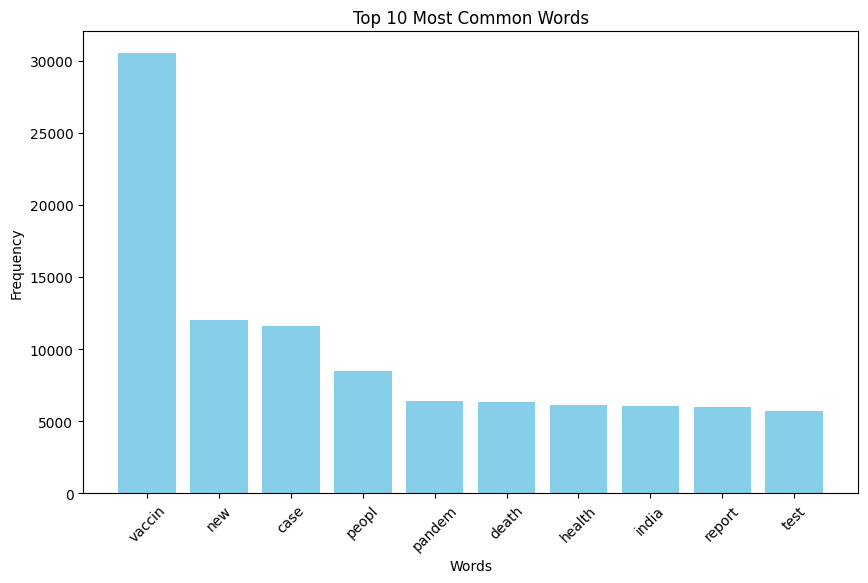

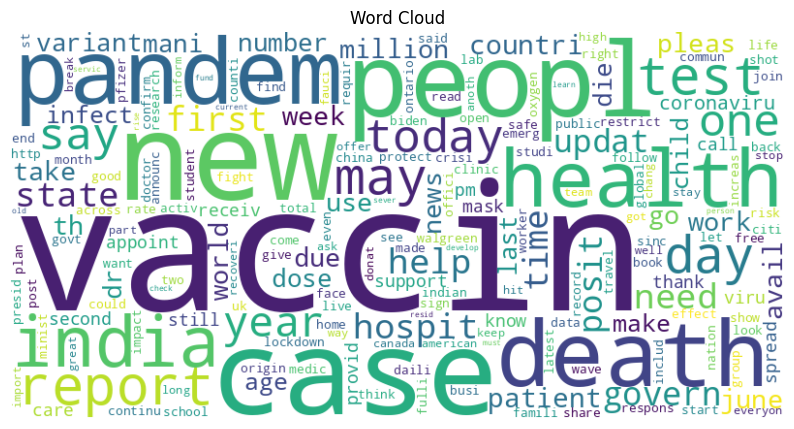

,Common_words,Frequency
0,vaccin,30507
1,new,12009
2,case,11608
3,peopl,8467
4,pandem,6424
5,death,6365
6,health,6139
7,india,6095
8,report,6007
9,test,5687


In [40]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk


# Sample dataset (replace this with your dataset)
covid_df['processed_text_covid']

# Function to calculate word frequency
def calculate_word_frequency(text_series):
    """Calculate word frequency from a pandas series of text."""
    all_words = []
    for text in text_series:
        words = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        all_words.extend(words)
    
    return Counter(all_words)

# Calculate word frequency
word_frequency = calculate_word_frequency(covid_df['processed_text_covid'])

# Display the 10 most common words
print("Top 10 Most Common Words:")
print(word_frequency.most_common(10))

# Create a bar plot of the top 10 words
top_words = word_frequency.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Tokenize and count word frequencies
covid_df['temp'] = covid_df['processed_text_covid'].apply(lambda x: str(x).split())
top = Counter([item for sublist in covid_df['temp'] for item in sublist])

# Create DataFrame for top 10 words
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words', 'Frequency']

# Display with gradient styling
temp_styled = temp.style.background_gradient(cmap='Purples')
temp_styled

Top 10 Most Common Words:
[('cases', 8485), ('vaccine', 8072), ('de', 6407), ('health', 6134), ('people', 5906), ('new', 5650), ('us', 5472), ('case', 4598), ('first', 4398), ('gay', 4100)]


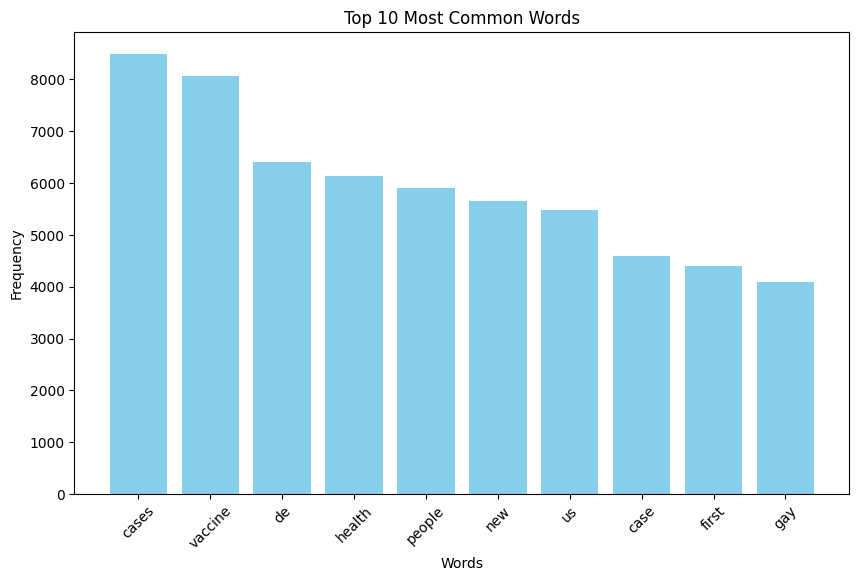

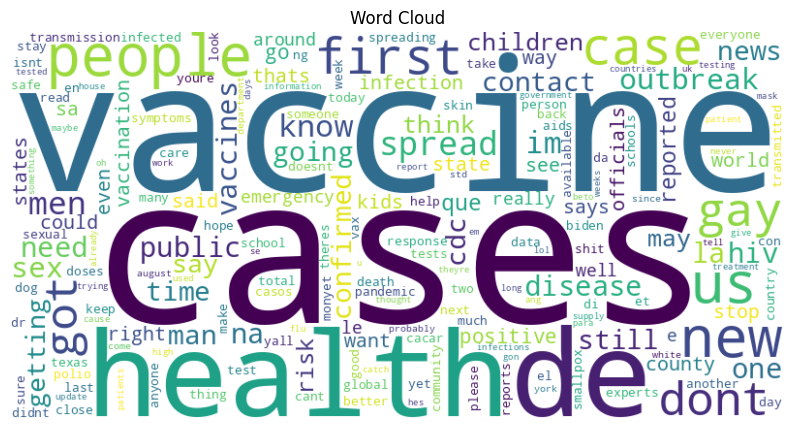

/tmp/ipykernel_177/597264567.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['temp'] = mpox_df['processed_text_mpox'].apply(lambda x: str(x).split())


,Common_words,Frequency
0,cases,8482
1,vaccine,8071
2,de,6407
3,health,6134
4,people,5906
5,new,5649
6,us,5471
7,case,4597
8,first,4398
9,gay,4100


In [41]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk


# Sample dataset (replace this with your dataset)
mpox_df['processed_text_mpox']

# Function to calculate word frequency
def calculate_word_frequency(text_series):
    """Calculate word frequency from a pandas series of text."""
    all_words = []
    for text in text_series:
        words = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        all_words.extend(words)
    
    return Counter(all_words)

# Calculate word frequency
word_frequency = calculate_word_frequency(mpox_df['processed_text_mpox'])

# Display the 10 most common words
print("Top 10 Most Common Words:")
print(word_frequency.most_common(10))

# Create a bar plot of the top 10 words
top_words = word_frequency.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Tokenize and count word frequencies
mpox_df['temp'] = mpox_df['processed_text_mpox'].apply(lambda x: str(x).split())
top = Counter([item for sublist in mpox_df['temp'] for item in sublist])

# Create DataFrame for top 10 words
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words', 'Frequency']

# Display with gradient styling
temp_styled = temp.style.background_gradient(cmap='Purples')
temp_styled

RoBERTa Sentiment Analysis (Unbiased Version)

In [42]:
# Import RoBERTa dependencies
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from torch.nn.functional import softmax
import numpy as np
from tqdm import tqdm
import pandas as pd

# ===============================
# Load RoBERTa model and tokenizer
# ===============================
def load_roberta():
    """Load RoBERTa model and tokenizer for sentiment analysis"""
    tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
    model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()
    
    return model, tokenizer, device

# Initialize model
model, tokenizer, device = load_roberta()

# ===============================
# Sentiment Inference Function
# ===============================
@torch.no_grad()
def get_sentiment(text):
    """Get sentiment score without any bias"""
    try:
        text = str(text)
        if len(text) > 512:
            text = text[:512]
        
        encoded_text = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
        encoded_text = {k: v.to(device) for k, v in encoded_text.items()}
        
        output = model(**encoded_text)
        scores = softmax(output.logits, dim=1).cpu().numpy()[0]
        
        labels = ['negative', 'neutral', 'positive']
        sentiment = labels[np.argmax(scores)]
        polarity_score = scores[2] - scores[0]  # positive - negative

        return polarity_score, sentiment
    except Exception as e:
        print(f"Error in sentiment analysis: {str(e)}")
        return 0.0, 'neutral'

# ===============================
# Apply Sentiment Analysis
# ===============================

print("Applying RoBERTa sentiment analysis (neutral, unbiased)...")
batch_size = 32

# Process COVID tweets
covid_results = []
for i in tqdm(range(0, len(covid_df), batch_size), desc="Processing COVID tweets"):
    batch = covid_df['processed_text_covid'].iloc[i:i+batch_size]
    results = [get_sentiment(text) for text in batch]
    covid_results.extend(results)
covid_df['covid_polarity'], covid_df['covid_sentiment'] = zip(*covid_results)

# Process Monkeypox tweets
mpox_results = []
for i in tqdm(range(0, len(mpox_df), batch_size), desc="Processing Monkeypox tweets"):
    batch = mpox_df['processed_text_mpox'].iloc[i:i+batch_size]
    results = [get_sentiment(text) for text in batch]
    mpox_results.extend(results)
mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)

print("\n Sentiment analysis complete!")

# ===============================
# (Optional) Save Results
# ===============================
# covid_df.to_csv("covid_sentiment_output.csv", index=False)
# mpox_df.to_csv("mpox_sentiment_output.csv", index=False)


Applying RoBERTa sentiment analysis (neutral, unbiased)...


Processing Monkeypox tweets: 100%|██████████| 3333/3333 [14:52<00:00,  3.73it/s]



 Sentiment analysis complete!


/tmp/ipykernel_177/3799791096.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)
/tmp/ipykernel_177/3799791096.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)


In [43]:
# ===============================
# (Optional) Save Results
# ===============================
covid_df.to_csv("covid_sentiment_output.csv", index=False)
mpox_df.to_csv("mpox_sentiment_output.csv", index=False)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


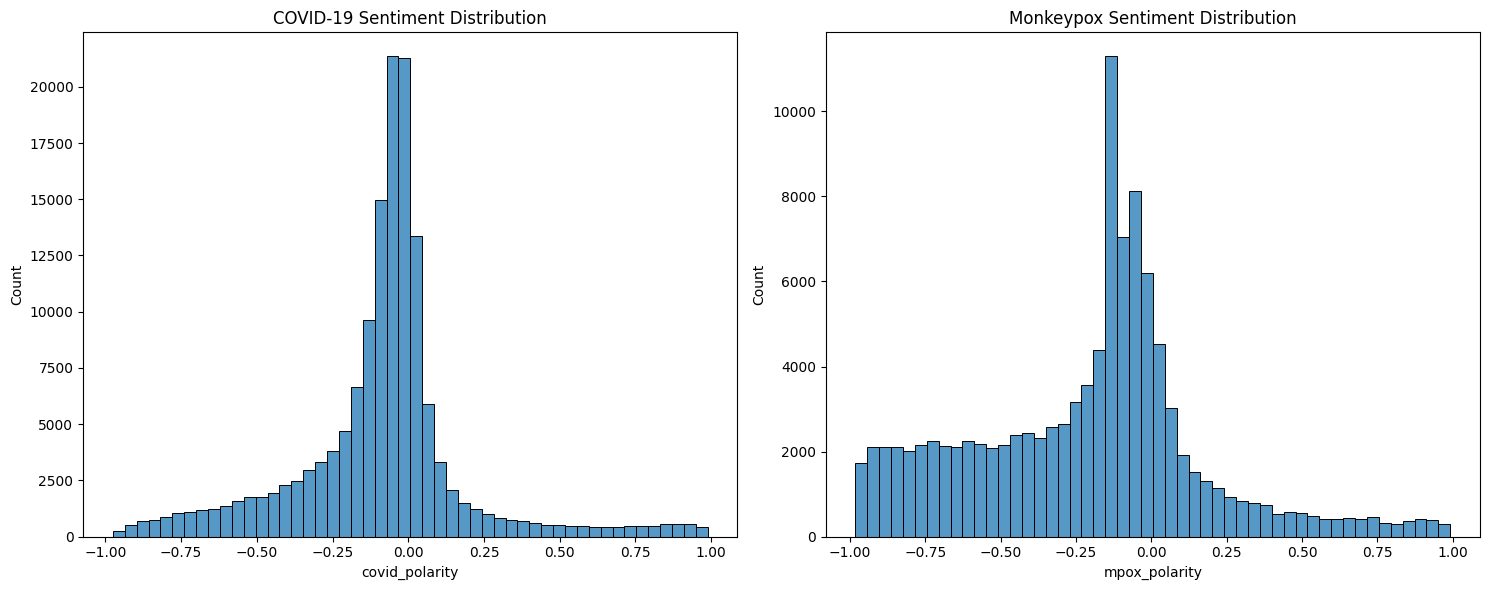


COVID-19 Sentiment Distribution (%):
covid_sentiment
neutral     86.2404
negative     9.4152
positive     4.3445
Name: proportion, dtype: float64

Monkeypox Sentiment Distribution (%):
mpox_sentiment
neutral     66.8664
negative    27.6702
positive     5.4633
Name: proportion, dtype: float64


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot polarity distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=covid_df, x='covid_polarity', bins=50)
plt.title('COVID-19 Sentiment Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=mpox_df, x='mpox_polarity', bins=50)
plt.title('Monkeypox Sentiment Distribution')

plt.tight_layout()
plt.show()

# Print sentiment percentages
print("\nCOVID-19 Sentiment Distribution (%):")
covid_percent = covid_df['covid_sentiment'].value_counts(normalize=True) * 100
print(covid_percent.round(4))  # Rounded to 4 decimal places

print("\nMonkeypox Sentiment Distribution (%):")
mpox_percent = mpox_df['mpox_sentiment'].value_counts(normalize=True) * 100
print(mpox_percent.round(4))


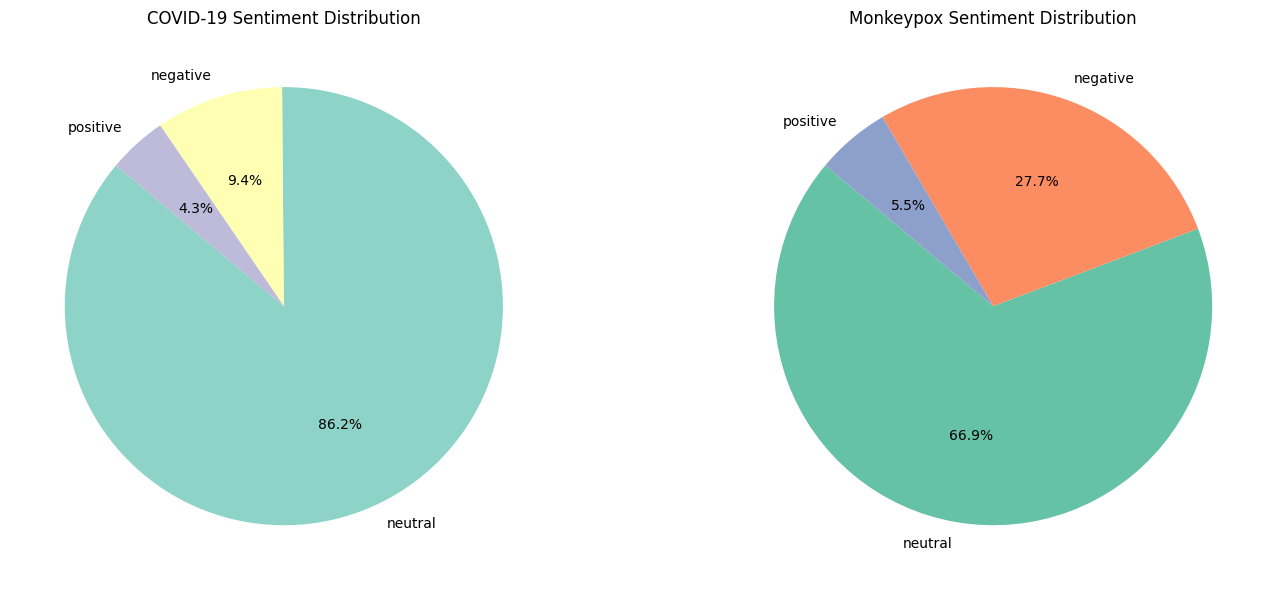


COVID-19 Sentiment Distribution:
covid_sentiment
neutral     86.240380
negative     9.415155
positive     4.344465
Name: proportion, dtype: float64

Monkeypox Sentiment Distribution:
mpox_sentiment
neutral     66.866408
negative    27.670249
positive     5.463343
Name: proportion, dtype: float64


In [45]:
import matplotlib.pyplot as plt

# Calculate sentiment distribution for both datasets
covid_sentiment_dist = covid_df['covid_sentiment'].value_counts(normalize=True) * 100
mpox_sentiment_dist = mpox_df['mpox_sentiment'].value_counts(normalize=True) * 100

# Plot the pie charts
plt.figure(figsize=(15, 6))

# COVID-19 Sentiment Pie Chart
plt.subplot(1, 2, 1)
plt.pie(covid_sentiment_dist, labels=covid_sentiment_dist.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('COVID-19 Sentiment Distribution')

# Monkeypox Sentiment Pie Chart
plt.subplot(1, 2, 2)
plt.pie(mpox_sentiment_dist, labels=mpox_sentiment_dist.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Monkeypox Sentiment Distribution')

plt.tight_layout()
plt.show()

# Print sentiment statistics
print("\nCOVID-19 Sentiment Distribution:")
print(covid_sentiment_dist)

print("\nMonkeypox Sentiment Distribution:")
print(mpox_sentiment_dist)


**PAF CAlculation**

Covid_Estimate RR from Sentiment-Annotated Tweets

In [46]:
import pandas as pd

# Load your sentiment-analyzed tweet dataset
df = pd.read_csv("covid_sentiment_output.csv")

# ✅ Expanded fear/anxiety-related keywords list
fear_keywords = [
    'fear', 'scared', 'anxiety', 'panic', 'terrified', 'afraid', 'worry', 'nervous', 'stress',
    'worried', 'dread', 'uneasy', 'trauma', 'paranoid', 'nightmare', 'alert', 'distress',
    'overwhelmed', 'uncertainty', 'insecure', 'helpless', 'danger', 'alarm', 'concern', 
    'shock', 'crisis', 'disaster', 'mental breakdown', 'breakdown', 'emergency', 'isolation',
    'loneliness', 'depression', 'suicidal', 'hopeless', 'mental health', 'freaked out',
    'shaken', 'collapse', 'unbearable', 'exhausted', 'fearful', 'anxious', 'tension',
    'claustrophobic', 'petrified', 'devastated', 'struggle', 'horrified', 'meltdown'
]

# Create 'exposure': True if tweet contains any fear-related keyword
df['exposure'] = df['processed_text_covid'].str.contains('|'.join(fear_keywords), case=False, na=False)

# Define 'outcome': sentiment is 'negative'
df['outcome'] = df['covid_sentiment'].str.lower() == 'negative'

# Count combinations for 2x2 table
A = len(df[(df['exposure'] == True) & (df['outcome'] == True)])   # Exposed & Negative
B = len(df[(df['exposure'] == True) & (df['outcome'] == False)])  # Exposed & Not Negative
C = len(df[(df['exposure'] == False) & (df['outcome'] == True)])  # Not Exposed & Negative
D = len(df[(df['exposure'] == False) & (df['outcome'] == False)]) # Not Exposed & Not Negative

# Calculate risks
risk_exposed = A / (A + B) if (A + B) > 0 else 0
risk_unexposed = C / (C + D) if (C + D) > 0 else 0

# Compute Relative Risk (RR)
RR = risk_exposed / risk_unexposed if risk_unexposed > 0 else float('inf')

# Print results
print(f"Exposed Negative (A): {A}")
print(f"Exposed Not Negative (B): {B}")
print(f"Unexposed Negative (C): {C}")
print(f"Unexposed Not Negative (D): {D}")
print(f"Risk (Exposed): {risk_exposed:.4f}")
print(f"Risk (Unexposed): {risk_unexposed:.4f}")
print(f"\n✅ Estimated Relative Risk (RR): {RR:.4f}")


Exposed Negative (A): 710
Exposed Not Negative (B): 2727
Unexposed Negative (C): 13175
Unexposed Not Negative (D): 130863
Risk (Exposed): 0.2066
Risk (Unexposed): 0.0915

✅ Estimated Relative Risk (RR): 2.2584


In [47]:
# Make sure you've already calculated RR, A, B, C, D
# Otherwise, you can include the RR code again here before this step

# Step 1: Proportion of exposed tweets (Pe)
total = A + B + C + D
Pe = (A + B) / total if total > 0 else 0

# Step 2: PAF formula
if RR != float('inf') and RR > 0:
    PAF = (Pe * (RR - 1)) / ((Pe * (RR - 1)) + 1)
else:
    PAF = None  # Handle case where RR is undefined or zero

# Step 3: Show results
print(f"\n🔍 Proportion Exposed (Pe): {Pe:.4f}")
print(f"📊 Relative Risk (RR): {RR:.4f}")
print(f"\n✅ Estimated Population Attributable Fraction (PAF): {PAF:.4f}" if PAF is not None else "❌ Cannot compute PAF (invalid RR)")



🔍 Proportion Exposed (Pe): 0.0233
📊 Relative Risk (RR): 2.2584

✅ Estimated Population Attributable Fraction (PAF): 0.0285


Mpox_Estimate RR from Sentiment-Annotated Tweets

In [48]:
import pandas as pd

# Load your sentiment-analyzed tweet dataset
df = pd.read_csv("mpox_sentiment_output.csv")

# ✅ Expanded fear/anxiety-related keywords list
fear_keywords = [
    'fear', 'scared', 'anxiety', 'panic', 'terrified', 'afraid', 'worry', 'nervous', 'stress',
    'worried', 'dread', 'uneasy', 'trauma', 'paranoid', 'nightmare', 'alert', 'distress',
    'overwhelmed', 'uncertainty', 'insecure', 'helpless', 'danger', 'alarm', 'concern', 
    'shock', 'crisis', 'disaster', 'mental breakdown', 'breakdown', 'emergency', 'isolation',
    'loneliness', 'depression', 'suicidal', 'hopeless', 'mental health', 'freaked out',
    'shaken', 'collapse', 'unbearable', 'exhausted', 'fearful', 'anxious', 'tension',
    'claustrophobic', 'petrified', 'devastated', 'struggle', 'horrified', 'meltdown'
]

# Create 'exposure': True if tweet contains any fear-related keyword
df['exposure'] = df['processed_text_mpox'].str.contains('|'.join(fear_keywords), case=False, na=False)

# Define 'outcome': sentiment is 'negative'
df['outcome'] = df['mpox_sentiment'].str.lower() == 'negative'

# Count combinations for 2x2 table
A = len(df[(df['exposure'] == True) & (df['outcome'] == True)])   # Exposed & Negative
B = len(df[(df['exposure'] == True) & (df['outcome'] == False)])  # Exposed & Not Negative
C = len(df[(df['exposure'] == False) & (df['outcome'] == True)])  # Not Exposed & Negative
D = len(df[(df['exposure'] == False) & (df['outcome'] == False)]) # Not Exposed & Not Negative

# Calculate risks
risk_exposed = A / (A + B) if (A + B) > 0 else 0
risk_unexposed = C / (C + D) if (C + D) > 0 else 0

# Compute Relative Risk (RR)
RR = risk_exposed / risk_unexposed if risk_unexposed > 0 else float('inf')

# Print results
print(f"Exposed Negative (A): {A}")
print(f"Exposed Not Negative (B): {B}")
print(f"Unexposed Negative (C): {C}")
print(f"Unexposed Not Negative (D): {D}")
print(f"Risk (Exposed): {risk_exposed:.4f}")
print(f"Risk (Unexposed): {risk_unexposed:.4f}")
print(f"\n✅ Estimated Relative Risk (RR): {RR:.4f}")


/tmp/ipykernel_177/3878444510.py:4: DtypeWarning: Columns (1,2,4,5,10,11,13,14,19,20,22,23,28,29,31,32,37,38,40,41,46,47,49,50,55,56,58,59,64,65,67,68,73,74,76,77,82,83,85,86,91,92,94,95,100,101,103,104,109,110,112,113,118,119,121,122,127,128,130,131,137,138,139,142,143,144,145,146,147,148,149,153,154,155,156,157,159,166,173,174,175,178,179,180,181,182,183,184,185,189,190,191,192,193,195,202,208,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("mpox_sentiment_output.csv")


Exposed Negative (A): 3700
Exposed Not Negative (B): 3388
Unexposed Negative (C): 25807
Unexposed Not Negative (D): 73743
Risk (Exposed): 0.5220
Risk (Unexposed): 0.2592

✅ Estimated Relative Risk (RR): 2.0136


In [49]:
# Make sure you've already calculated RR, A, B, C, D
# Otherwise, you can include the RR code again here before this step

# Step 1: Proportion of exposed tweets (Pe)
total = A + B + C + D
Pe = (A + B) / total if total > 0 else 0

# Step 2: PAF formula
if RR != float('inf') and RR > 0:
    PAF = (Pe * (RR - 1)) / ((Pe * (RR - 1)) + 1)
else:
    PAF = None  # Handle case where RR is undefined or zero

# Step 3: Show results
print(f"\n🔍 Proportion Exposed (Pe): {Pe:.4f}")
print(f"📊 Relative Risk (RR): {RR:.4f}")
print(f"\n✅ Estimated Population Attributable Fraction (PAF): {PAF:.4f}" if PAF is not None else "❌ Cannot compute PAF (invalid RR)")



🔍 Proportion Exposed (Pe): 0.0665
📊 Relative Risk (RR): 2.0136

✅ Estimated Population Attributable Fraction (PAF): 0.0631


CFR

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# ✅ Expanded Keyword Lists
# ===========================

death_keywords_covid = [
    'died', 'dead', 'deaths', 'mortality', 'fatal', 'passed away',
    'loss of life', 'deceased', 'succumbed', 'life lost', 'killed', 'death toll'
]

case_keywords_covid = [
    'case', 'cases', 'infected', 'infection', 'positive', 'confirmed',
    'tested positive', 'symptoms', 'diagnosed', 'hospitalized', 'admitted',
    'isolation', 'quarantine', 'spreading', 'cluster', 'covid+', 'catching covid'
]

# ===========================
# ✅ Keyword Count Function
# ===========================

def count_keywords(text_series, keywords):
    """Count how many times keywords appear in the entire text column."""
    keyword_pattern = '(?i)' + '|'.join(keywords)  # case-insensitive regex
    return text_series.str.count(keyword_pattern).sum()

# ===========================
# ✅ Count Mentions in Tweets
# ===========================

covid_deaths_count = count_keywords(covid_df['processed_text_covid'], death_keywords_covid)
covid_cases_count = count_keywords(covid_df['processed_text_covid'], case_keywords_covid)

# ===========================
# ✅ Calculate CFR
# ===========================

def calculate_cfr(deaths, cases):
    if cases == 0:
        return 0
    return (deaths / cases) * 100

covid_cfr = calculate_cfr(covid_deaths_count, covid_cases_count)

print(f"COVID Case Fatality Rate (CFR): {covid_cfr:.2f}%")

# ===========================
# ✅ Visualize CFR
# ===========================

cfr_data = pd.DataFrame({
    'Disease': ['COVID-19'],
    'CFR (%)': [covid_cfr]
})


COVID Case Fatality Rate (CFR): 14.82%


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# ✅ Expanded Keyword Lists
# ===========================

death_keywords_mpox = [
    'died', 'dead', 'deaths', 'mortality', 'fatal', 'passed away',
    'loss of life', 'deceased', 'succumbed', 'life lost', 'killed', 'death toll'
]

case_keywords_mpox = [
    'case', 'cases', 'infected', 'infection', 'positive', 'confirmed',
    'tested positive', 'symptoms', 'diagnosed', 'hospitalized', 'admitted',
    'isolation', 'quarantine', 'spreading', 'cluster', 'rash', 'lesions', 'fever',
    'monkeypox', 'mpox'
]

# ===========================
# ✅ Keyword Count Function
# ===========================

def count_keywords(text_series, keywords):
    """Count how many times keywords appear in the entire text column."""
    keyword_pattern = '(?i)' + '|'.join(keywords)  # case-insensitive regex
    return text_series.str.count(keyword_pattern).sum()

# ===========================
# ✅ Count Mentions in Mpox Tweets
# ===========================

mpox_deaths_count = count_keywords(mpox_df['processed_text_mpox'], death_keywords_mpox)
mpox_cases_count = count_keywords(mpox_df['processed_text_mpox'], case_keywords_mpox)

# ===========================
# ✅ Calculate CFR
# ===========================

def calculate_cfr(deaths, cases):
    if cases == 0:
        return 0
    return (deaths / cases) * 100

mpox_cfr = calculate_cfr(mpox_deaths_count, mpox_cases_count)

print(f"Mpox Case Fatality Rate (CFR): {mpox_cfr:.2f}%")

# ===========================
# ✅ Visualize CFR for Mpox
# ===========================

cfr_data = pd.DataFrame({
    'Disease': ['Mpox'],
    'CFR (%)': [mpox_cfr]
})


Mpox Case Fatality Rate (CFR): 6.37%


In [52]:
import pandas as pd
import os

# Load the RoBERTa-annotated sentiment file
covid_df = pd.read_csv("covid_sentiment_output.csv")  # Already contains processed_text_covid and covid_sentiment

# Filter for domain A (neutral) and domain B (negative)
neutral_tweets = covid_df[covid_df['covid_sentiment'] == 'neutral']['processed_text_covid'].dropna().tolist()
negative_tweets = covid_df[covid_df['covid_sentiment'] == 'negative']['processed_text_covid'].dropna().tolist()
negative_tweets = covid_df[covid_df['covid_sentiment'] == 'positive']['processed_text_covid'].dropna().tolist()

print(f"Neutral tweets: {len(neutral_tweets)}")
print(f"Negative tweets: {len(negative_tweets)}")
print(f"Positive tweets: {len(positive_tweets)}")


Neutral tweets: 126061
Negative tweets: 6407


NameError: name 'positive_tweets' is not defined

In [ ]:
sd

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Function to calculate word frequencies
def calculate_word_frequency(text_series):
    """Calculate word frequency from a pandas series of text."""
    all_words = []
    for text in text_series:
        words = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        all_words.extend(words)
    return Counter(all_words)

# Filter the dataset by sentiment
positive_text = covid_df[covid_df['covid_sentiment'] == 'positive']['processed_text_covid']
negative_text = covid_df[covid_df['covid_sentiment'] == 'negative']['processed_text_covid']
neutral_text  = covid_df[covid_df['covid_sentiment'] ==  'neutral']['processed_text_covid']

# Calculate word frequencies for each sentiment
positive_word_frequency = calculate_word_frequency(positive_text)
negative_word_frequency = calculate_word_frequency(negative_text)
neutral_word_frequency = calculate_word_frequency(neutral_text)

# Function to generate and display word cloud
def generate_word_cloud(word_frequency, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds
generate_word_cloud(positive_word_frequency, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_word_frequency, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_word_frequency, 'Neutral Sentiment Word Cloud')


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

#nltk.download('punkt')

# Function to calculate word frequencies
def calculate_word_frequency(text_series):
    """Calculate word frequency from a pandas series of text."""
    all_words = []
    for text in text_series:
        words = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        all_words.extend(words)
    return Counter(all_words)

# Filter the dataset by sentiment
positive_text = mpox_df[mpox_df['mpox_sentiment'] == 'positive']['processed_text_mpox']
negative_text = mpox_df[mpox_df['mpox_sentiment'] == 'negative']['processed_text_mpox']
neutral_text  = mpox_df[mpox_df['mpox_sentiment'] ==  'neutral']['processed_text_mpox']

# Calculate word frequencies for each sentiment
positive_word_frequency = calculate_word_frequency(positive_text)
negative_word_frequency = calculate_word_frequency(negative_text)
neutral_word_frequency = calculate_word_frequency(neutral_text)

# Function to generate and display word cloud
def generate_word_cloud(word_frequency, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds
generate_word_cloud(positive_word_frequency, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_word_frequency, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_word_frequency, 'Neutral Sentiment Word Cloud')


In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment distribution for both datasets
covid_sentiment_dist = covid_df['covid_sentiment'].value_counts(normalize=True) * 100
mpox_sentiment_dist = mpox_df['mpox_sentiment'].value_counts(normalize=True) * 100

# Plot the pie charts
plt.figure(figsize=(15, 6))

# COVID-19 Sentiment Pie Chart
plt.subplot(1, 2, 1)
plt.pie(covid_sentiment_dist, labels=covid_sentiment_dist.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('COVID-19 Sentiment Distribution')

# Monkeypox Sentiment Pie Chart
plt.subplot(1, 2, 2)
plt.pie(mpox_sentiment_dist, labels=mpox_sentiment_dist.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Monkeypox Sentiment Distribution')

plt.tight_layout()
plt.show()

# Print sentiment statistics
print("\nCOVID-19 Sentiment Distribution:")
print(covid_sentiment_dist)

print("\nMonkeypox Sentiment Distribution:")
print(mpox_sentiment_dist)


**XGB_mpox**

Accuracy Score: 73.23%

Overall Model Performance:
Precision: 0.80
Recall: 0.44
F1 Score: 0.47


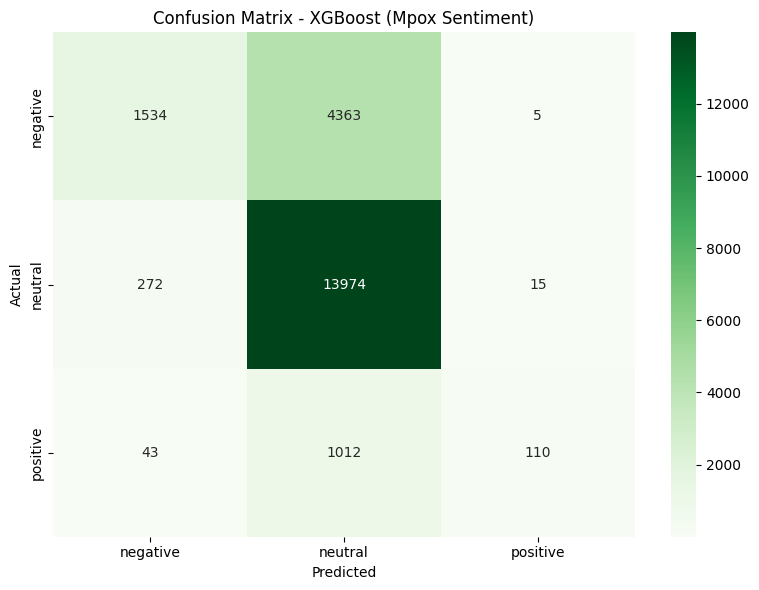


Classification Report:
              precision    recall  f1-score   support

    negative      0.830     0.260     0.396      5902
     neutral      0.722     0.980     0.832     14261
    positive      0.846     0.094     0.170      1165

    accuracy                          0.732     21328
   macro avg      0.799     0.445     0.466     21328
weighted avg      0.759     0.732     0.675     21328



In [64]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay)
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ===============================
# ✅ Step 1: Clean Labels
# ===============================
# Standardize labels
mpox_df['mpox_sentiment'] = mpox_df['mpox_sentiment'].str.lower().str.strip()

# Filter only valid sentiment classes
valid_labels = ['positive', 'neutral', 'negative']
mpox_df = mpox_df[mpox_df['mpox_sentiment'].isin(valid_labels)]

# ===============================
# ✅ Step 2: Prepare Data
# ===============================
X = mpox_df['processed_text_mpox']
y = mpox_df['mpox_sentiment']

# Encode target labels as integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # XGBoost requires numeric labels

# ===============================
# ✅ Step 3: Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# ===============================
# ✅ Step 4: TF-IDF Vectorization
# ===============================
vectorizer = TfidfVectorizer(max_features=1500)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ===============================
# ✅ Step 5: XGBoost Model
# ===============================
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,  # 3 sentiment classes
    max_depth=2,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train_vec, y_train)

# ===============================
# ✅ Step 6: Prediction
# ===============================
y_pred = xgb_model.predict(X_test_vec)

# Decode predictions back to labels
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# ===============================
# ✅ Step 7: Evaluation
# ===============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy Score: {accuracy * 100:.2f}%\n")
print("Overall Model Performance:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# ===============================
# ✅ Step 8: Confusion Matrix
# ===============================
class_names = le.classes_
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - XGBoost (Mpox Sentiment)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ===============================
# ✅ Step 9: Classification Report
# ===============================
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, digits=3))


**XGB_covid**


Accuracy Score: 81.39%
Overall Model Performance:
Precision: 0.81
Recall:    0.36
F1 Score:  0.35


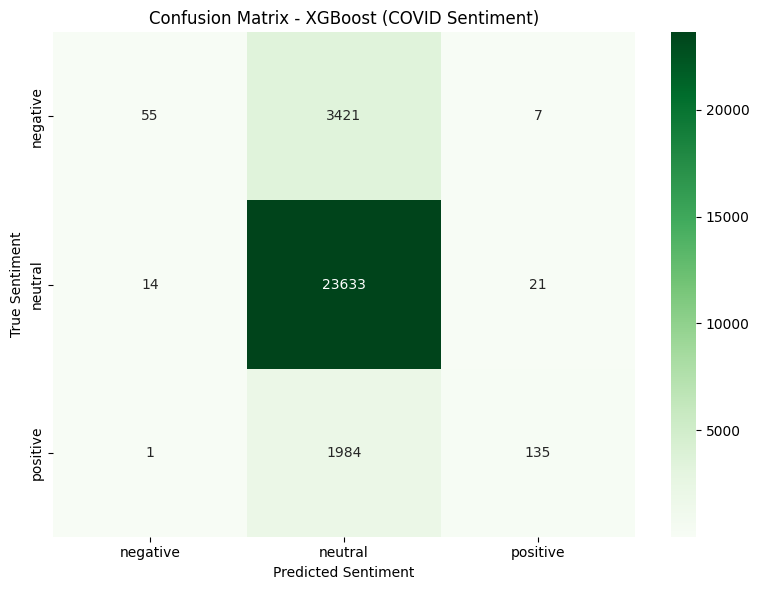


Classification Report:
              precision    recall  f1-score   support

    negative      0.786     0.016     0.031      3483
     neutral      0.814     0.999     0.897     23668
    positive      0.828     0.064     0.118      2120

    accuracy                          0.814     29271
   macro avg      0.809     0.359     0.349     29271
weighted avg      0.812     0.814     0.737     29271



In [72]:
# ==========================================
# ✅ COVID Sentiment Classification with XGBoost
# ==========================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# ===============================
# ✅ Load COVID Dataset
# ===============================
# Assuming your DataFrame is already named `covid_df`
# and contains columns 'processed_text_covid' and 'covid_sentiment'

# Drop rows with missing text or sentiment
covid_df = covid_df.dropna(subset=['processed_text_covid', 'covid_sentiment'])

# Normalize labels (e.g., " Positive " → "positive")
covid_df['covid_sentiment'] = covid_df['covid_sentiment'].str.lower().str.strip()

# Keep only valid classes
valid_labels = ['positive', 'neutral', 'negative']
covid_df = covid_df[covid_df['covid_sentiment'].isin(valid_labels)]

# ===============================
# ✅ Define Features and Target
# ===============================
X = covid_df['processed_text_covid']
y = covid_df['covid_sentiment']

# Label encode sentiment classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts to 0/1/2

# ===============================
# ✅ Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ===============================
# ✅ TF-IDF Vectorization
# ===============================
vectorizer = TfidfVectorizer(max_features=1500)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ===============================
# ✅ Train XGBoost Model
# ===============================
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    max_depth=2,
    learning_rate=0.1,
    n_estimators=40,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train_vec, y_train)

# ===============================
# ✅ Predictions
# ===============================
y_pred = xgb_model.predict(X_test_vec)

# Decode labels back to original sentiment classes
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# ===============================
# ✅ Evaluation Metrics
# ===============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nAccuracy Score: {accuracy * 100:.2f}%")
print("Overall Model Performance:")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# ===============================
# ✅ Confusion Matrix
# ===============================
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost (COVID Sentiment)")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.tight_layout()
plt.show()

# ===============================
# ✅ Classification Report
# ===============================
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, digits=3))


**KNN_Mpox**


Accuracy Score: 77.65%
Overall Model Performance:
Precision: 0.73
Recall:    0.61
F1 Score:  0.65


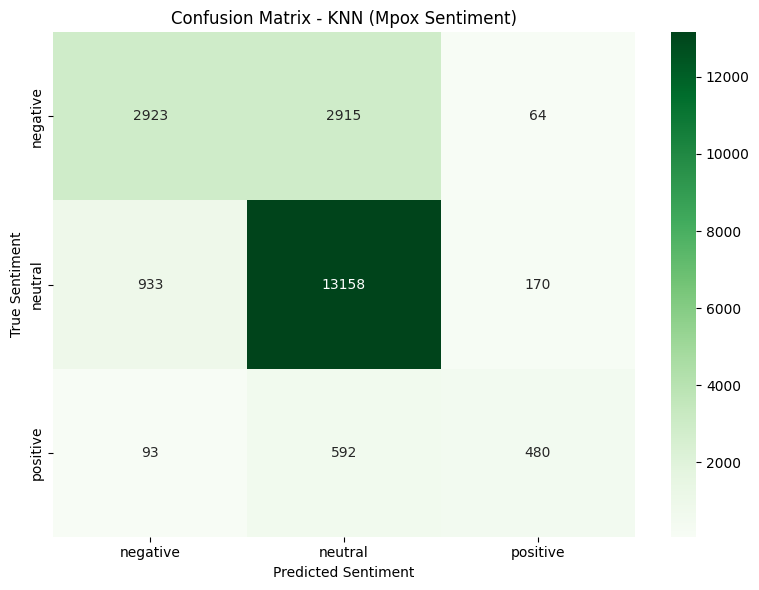


Classification Report:
              precision    recall  f1-score   support

    negative      0.740     0.495     0.593      5902
     neutral      0.790     0.923     0.851     14261
    positive      0.672     0.412     0.511      1165

    accuracy                          0.776     21328
   macro avg      0.734     0.610     0.652     21328
weighted avg      0.769     0.776     0.761     21328



In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# ✅ Load Mpox Dataset
# ===============================
# Make sure `mpox_df` has columns: 'processed_text_mpox' and 'mpox_sentiment'
# Example: mpox_df = pd.read_csv("your_mpox_data.csv")

# Drop missing rows
mpox_df = mpox_df.dropna(subset=['processed_text_mpox', 'mpox_sentiment'])

# Clean sentiment labels
mpox_df['mpox_sentiment'] = mpox_df['mpox_sentiment'].str.lower().str.strip()

# Keep only valid classes
valid_labels = ['positive', 'neutral', 'negative']
mpox_df = mpox_df[mpox_df['mpox_sentiment'].isin(valid_labels)]

# ===============================
# ✅ Features and Target
# ===============================
X = mpox_df['processed_text_mpox']
y = mpox_df['mpox_sentiment']

# Encode labels to 0/1/2
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ===============================
# ✅ Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# ===============================
# ✅ TF-IDF Vectorization
# ===============================
vectorizer = TfidfVectorizer(max_features=1500)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ===============================
# ✅ Train KNN Classifier
# ===============================
knn_model = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn_model.fit(X_train_vec, y_train)

# ===============================
# ✅ Predictions
# ===============================
y_pred = knn_model.predict(X_test_vec)

# Decode labels
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# ===============================
# ✅ Evaluation Metrics
# ===============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nAccuracy Score: {accuracy * 100:.2f}%")
print("Overall Model Performance:")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# ===============================
# ✅ Confusion Matrix
# ===============================
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - KNN (Mpox Sentiment)")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.tight_layout()
plt.show()

# ===============================
# ✅ Classification Report
# ===============================
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, digits=3))


**KNN_covid**


Accuracy Score: 74.12%
Overall Model Performance:
Precision: 0.44
Recall:    0.42
F1 Score:  0.42


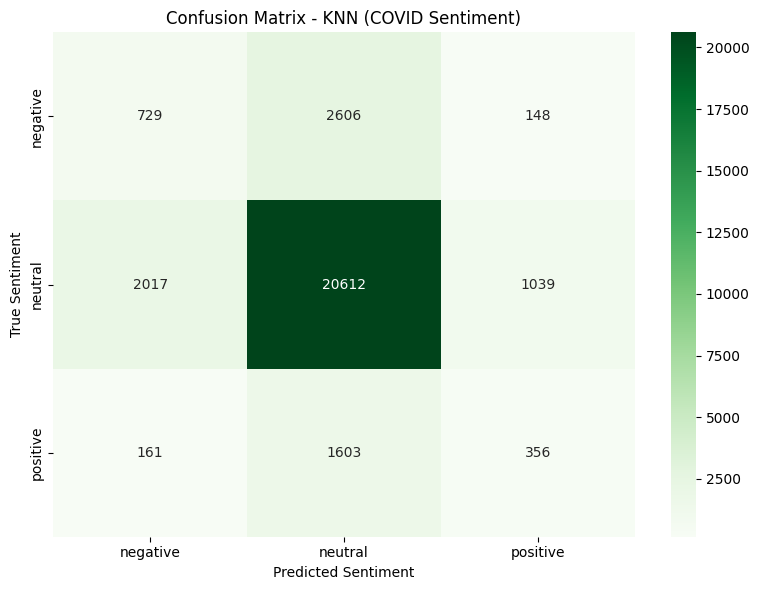


Classification Report:
              precision    recall  f1-score   support

    negative      0.251     0.209     0.228      3483
     neutral      0.830     0.871     0.850     23668
    positive      0.231     0.168     0.194      2120

    accuracy                          0.741     29271
   macro avg      0.437     0.416     0.424     29271
weighted avg      0.718     0.741     0.729     29271



In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# ✅ Load COVID Dataset
# ===============================
# Ensure `covid_df` contains columns: 'processed_text_covid' and 'covid_sentiment'
# Example: covid_df = pd.read_csv("your_covid_data.csv")

# Drop missing data
covid_df = covid_df.dropna(subset=['processed_text_covid', 'covid_sentiment'])

# Clean sentiment labels
covid_df['covid_sentiment'] = covid_df['covid_sentiment'].str.lower().str.strip()

# Keep only valid sentiment classes
valid_labels = ['positive', 'neutral', 'negative']
covid_df = covid_df[covid_df['covid_sentiment'].isin(valid_labels)]

# ===============================
# ✅ Define Features and Target
# ===============================
X = covid_df['processed_text_covid']
y = covid_df['covid_sentiment']

# Encode labels (0: negative, 1: neutral, 2: positive)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ===============================
# ✅ Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=1, stratify=y_encoded
)

# ===============================
# ✅ TF-IDF Vectorization
# ===============================
vectorizer = TfidfVectorizer(max_features=100)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ===============================
# ✅ Train KNN Model
# ===============================
knn_model = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn_model.fit(X_train_vec, y_train)

# ===============================
# ✅ Predictions
# ===============================
y_pred = knn_model.predict(X_test_vec)

# Decode labels
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# ===============================
# ✅ Evaluation Metrics
# ===============================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nAccuracy Score: {accuracy * 100:.2f}%")
print("Overall Model Performance:")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# ===============================
# ✅ Confusion Matrix
# ===============================
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - KNN (COVID Sentiment)")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.tight_layout()
plt.show()

# ===============================
# ✅ Classification Report
# ===============================
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, digits=3))
